<a href="https://colab.research.google.com/github/saini7hin/portfolio-template/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Develop A Neural Network That Can Read Handwriting**

Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners.

**Importing the necessary libraries**

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt

**Loading the MNIST dataset**

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Visualizing the dataset**

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
Y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

**Checking the values of each pixel before the normalization process**

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

**Visualising the dataset**

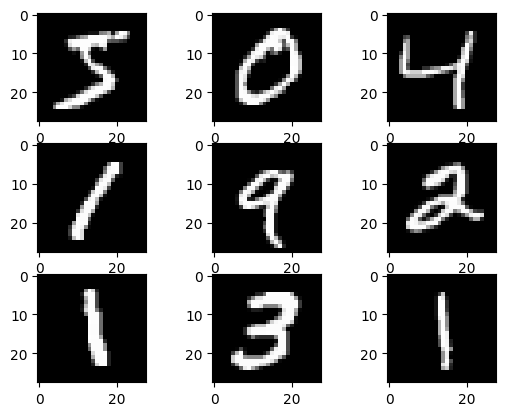

In [ ]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

**Reshaping the data**

In [ ]:
X_train_r = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[2], 1)
X_test_r = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[2], 1)

**Normalizing the data**

In [ ]:
X_train_r = tf.keras.utils.normalize(X_train_r, axis = 1)
X_test_r = tf.keras.utils.normalize(X_test_r, axis = 1)

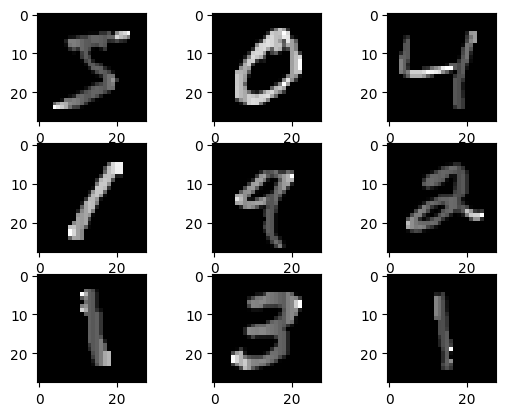

In [ ]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.squeeze(X_train_r[i]), cmap=plt.get_cmap('gray'))
plt.show()

**Creating a simple CNN Model**

In [ ]:
image_shape = X_train_r.shape[1:]
print(image_shape)

(28, 28, 1)


In [ ]:
model = model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(48, (3,3), activation = tf.nn.relu, input_shape = image_shape))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_r, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0212 - accuracy: 0.9936
Epoch 2/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0181 - accuracy: 0.9945
Epoch 3/10
1875/1875 [==============================] - 87s 47ms/step - loss: 0.0178 - accuracy: 0.9938
Epoch 4/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0166 - accuracy: 0.9945
Epoch 5/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0155 - accuracy: 0.9947
Epoch 6/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0139 - accuracy: 0.9956
Epoch 7/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0152 - accuracy: 0.9949
Epoch 8/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0146 - accuracy: 0.9952
Epoch 9/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0130 - accuracy: 0.9957
Epoch 10/10
1875/1875 [==============================] - 82s 44

**Summary of the CNN Model**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 48)        480       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        27712     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

**Plotting the CNN Model**

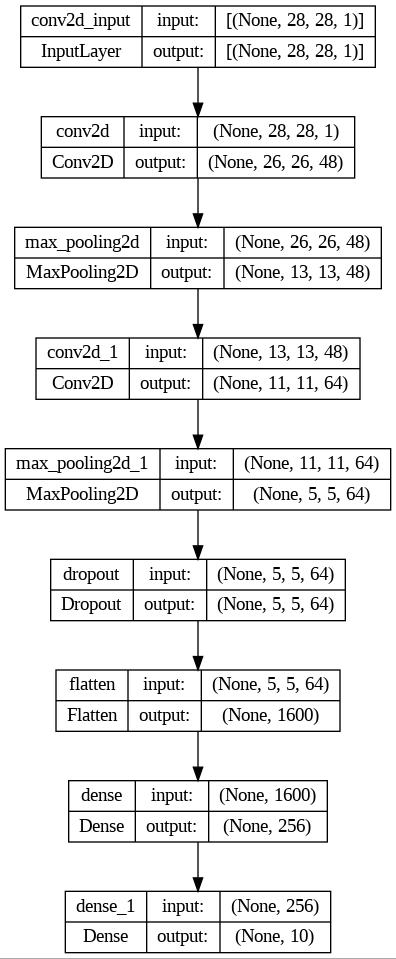

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'smile.jpg', show_shapes = True)

**Evaluating the model based on validation loss and validation accuracy**

In [ ]:
val_loss, val_accuracy = model.evaluate(X_test, Y_test)
print("Validation loss : ", val_loss*100, "%")
print("Validation accuracy : ", val_accuracy*100,"%")

313/313 [==============================] - 4s 12ms/step - loss: 62.9519 - accuracy: 0.9597
Validation loss :  6295.18928527832 %
Validation accuracy :  95.96999883651733 %


**Saving the model**

In [ ]:
model.save('/content/drive/MyDrive/Machine Learning Projects/Mnist.model')

**Predicting a random test case**

In [ ]:
new_model = tf.keras.models.load_model("/content/drive/MyDrive/Machine Learning Projects/Mnist.model")

In [ ]:
predictions = new_model.predict(X_test)

313/313 [==============================] - 5s 15ms/step


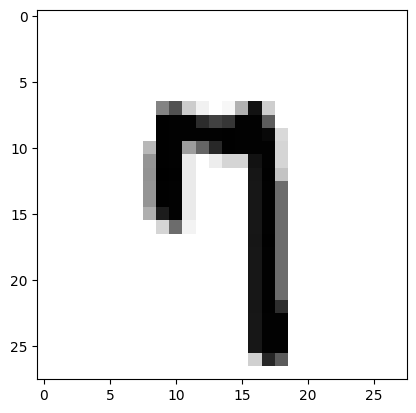

In [ ]:
plt.imshow(X_test[80], cmap = plt.get_cmap('binary'))

In [ ]:
print("The prediction is : ", np.argmax(predictions[80]))

The prediction is :  7
